# TP1 - MSI : Intervalles de confiance et tests d'hypothèses
## Généralités

In [4]:
path = "/Users/henrye/Documents/MSI"
setwd(path)

**Question 1 :** Lire le fichier

In [5]:
data = read.csv('titanic.txt', sep=',')
summary(data)

   row.names    pclass       survived                               name     
 Min.   :   1   1st:322   Min.   :0.000   Carlsson, Mr Frans Olof     :   2  
 1st Qu.: 329   2nd:280   1st Qu.:0.000   Connolly, Miss Kate         :   2  
 Median : 657   3rd:711   Median :0.000   Kelly, Mr James             :   2  
 Mean   : 657             Mean   :0.342   Abbing, Mr Anthony          :   1  
 3rd Qu.: 985             3rd Qu.:1.000   Abbott, Master Eugene Joseph:   1  
 Max.   :1313             Max.   :1.000   Abbott, Mr Rossmore Edward  :   1  
                                          (Other)                     :1304  
      age                 embarked                  home.dest        room     
 Min.   : 0.1667              :492                       :559          :1236  
 1st Qu.:21.0000   Cherbourg  :203   New York, NY        : 65   F-33   :   4  
 Median :30.0000   Queenstown : 45   London              : 14   C-101  :   3  
 Mean   :31.1942   Southampton:573   Montreal, PQ        : 1

**Question 2 :** 
* Lire des données manquantes 

In [6]:
paste('Nombre dage de passagers manquant :', sum(is.na(data$age))) # Les données manquantes sont soient vide soient égales à NA

[1] "Nombre dage de passagers manquant : 680"

* Nombre de passagers recensés

In [7]:
paste('Nombre de passagers recensés :', nrow(data))

[1] "Nombre de passagers recensés : 1313"

* Nombre de passagers survivants

In [8]:
paste('Nombre de passagers survivants :', sum(data$survived))

[1] "Nombre de passagers survivants : 449"

* Ports d'embarquements

In [9]:
levels(data$embarked)

[1] ""            "Cherbourg"   "Queenstown"  "Southampton"

**Question 3 :** Répartition des passagers par classe

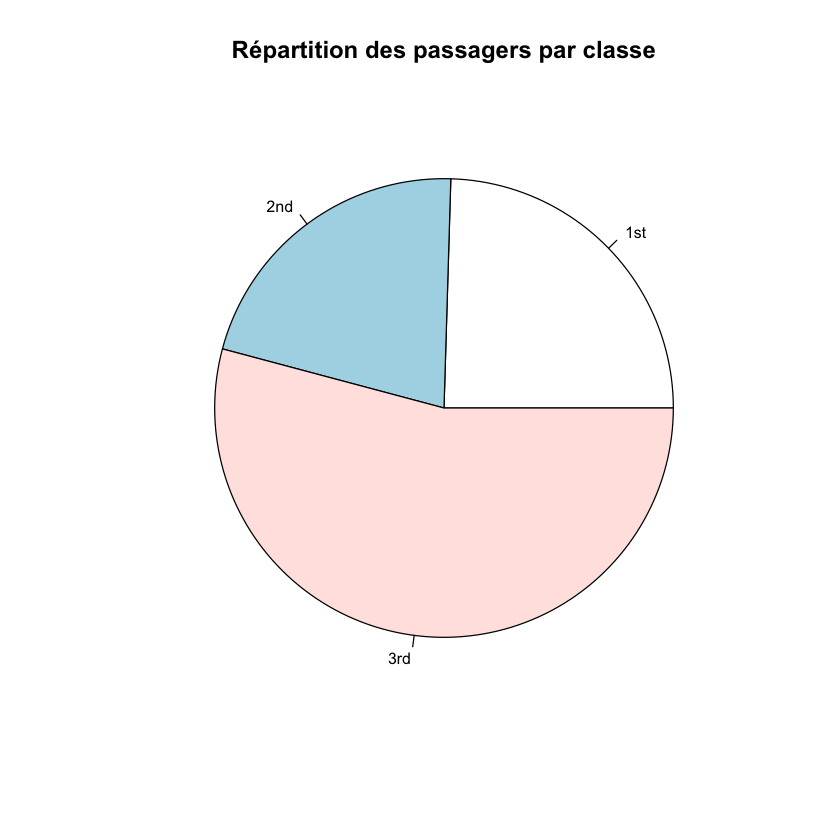

In [10]:
values = table(data$pclass)
pie(values, main='Répartition des passagers par classe', cex=0.8)

**Question 4 :** Construction de variables bolééennes

In [11]:
Prem_class = data$pclass == '1st'
Sec_class = data$pclass == '2nd'
Ter_class = data$pclass == '3rd'

**Question 5 :** Proportion de survivants suivant les classes

In [12]:
paste('1ère classe :', sum(data$survived[Prem_class])/nrow(data[Prem_class, ]))
paste('2ème classe :', sum(data$survived[Sec_class])/nrow(data[Sec_class, ]))
paste('3ème classe :', sum(data$survived[Ter_class])/nrow(data[Ter_class, ]))

[1] "1ère classe : 0.599378881987578"

[1] "2ème classe : 0.425"

[1] "3ème classe : 0.192686357243319"

**Question 6 :** Age moyen par classe

[1] "1ère classe : 39.6677730088496"

[1] "2ème classe : 28.3003141509434"

[1] "3ème classe : 24.5196579487179"

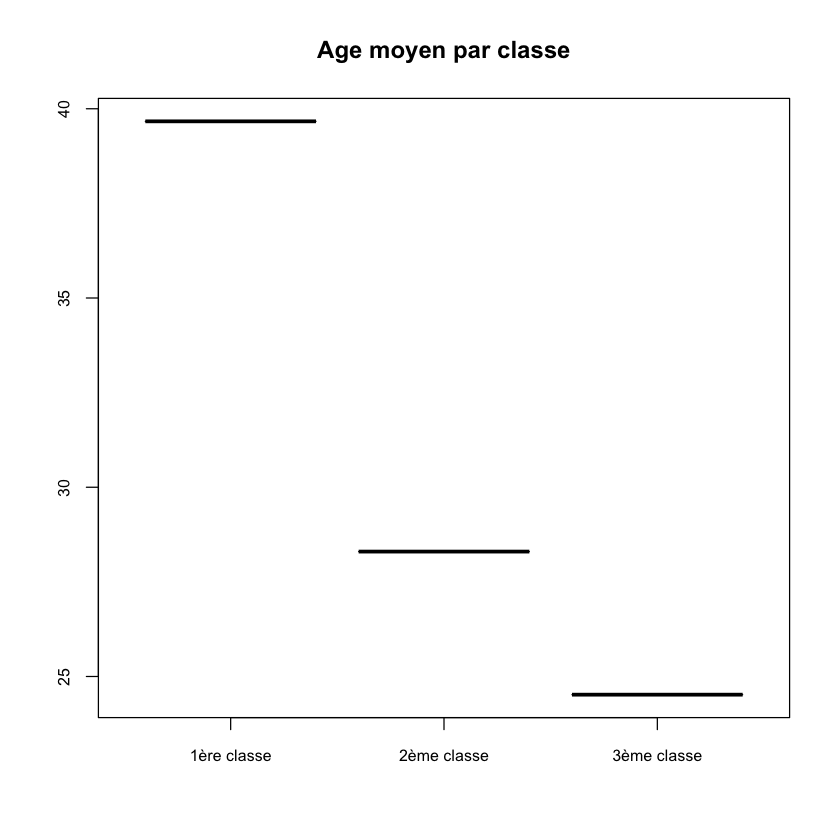

In [13]:
age1 = mean(data$age[Prem_class], na.rm=TRUE)
age2 = mean(data$age[Sec_class], na.rm=TRUE)
age3 = mean(data$age[Ter_class], na.rm=TRUE)

paste('1ère classe :', age1)
paste('2ème classe :', age2)
paste('3ème classe :', age3)

boxplot(age1, age2, age3, names=c('1ère classe', '2ème classe', '3ème classe'), main='Age moyen par classe', cex.names=0.8, cex.axis=0.8)

## Estimation

**Question 7 :** Age répartit selon une loi normale de paramètres inconnus

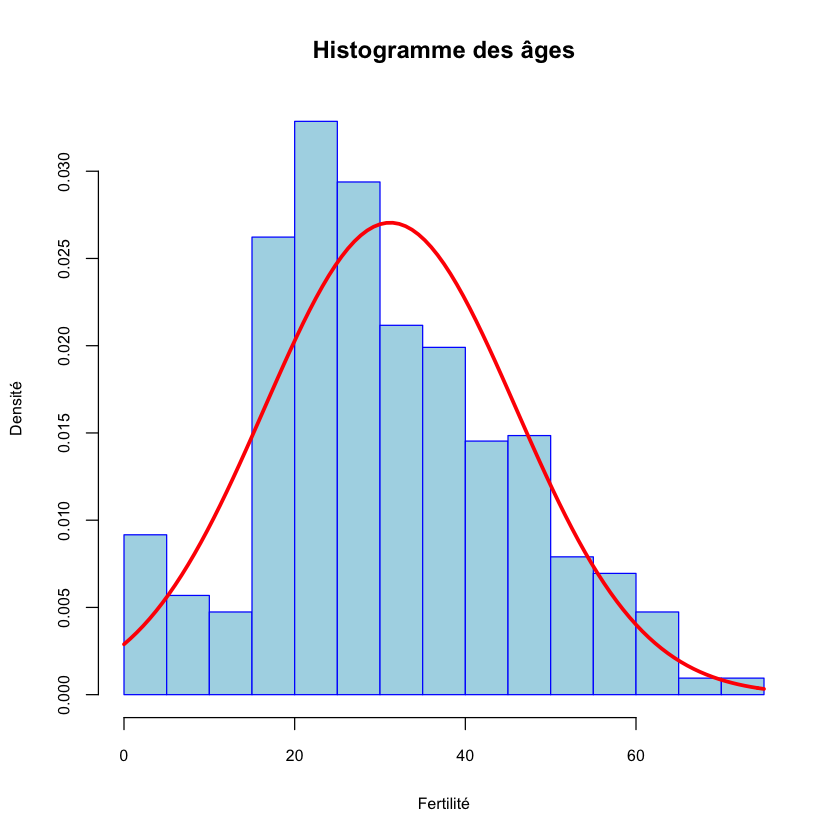

In [14]:
x_barre = mean(data$age, na.rm=TRUE)
s_carree = sd(data$age, na.rm=TRUE)
# Plot de la répartition des valeurs effectives prises par la variable (histogramme)
hist(data$age,freq=FALSE,border="blue", col="lightblue", xlab="Fertilité", ylab="Densité", main="Histogramme des âges", cex.axis=0.8, cex.lab=0.8)
# Plot de la courb suivie par la loie normale (lwd détermine l'épaisseur du trait)
curve(dnorm(x,x_barre,s_carree),add=TRUE,col="red",lwd=3) 

**Question 8 :** Intervalle de confiance

In [15]:
n = sum(!is.na(data$age));
t = qt(p = 0.975, df = n-1) # alpa = 5%
inf = x_barre - t*s_carree/sqrt(n) # /!\ on obtient s* et pas s, donc sqrt(n) et pas sqrt(n-1)
sup = x_barre + t*s_carree/sqrt(n)
IC = c(inf, sup)
IC

[1] 30.04312 32.34524

L’âge moyen d’un passager à bord du Titanic est compris entre 30,04 ans et 32,35 ans

## Test d'hypothèses
**Question 9 :** Vérification de l'hypothèses : "age suit une loi normale" avec un risue alpha = 1%

In [16]:
alpha = 0.01
# Le test de Shapiro-Wilk est un test permettant de savoir si une série de données suit une loi normale
age_norm = shapiro.test(data$age)
age_norm


	Shapiro-Wilk normality test

data:  data$age
W = 0.98264, p-value = 7.771e-07


In [17]:
if (age_norm$p.value>alpha){
  print("H0 accepté")
} else {
  print("H0 rejeté")
}

[1] "H0 rejeté"


Même question seuleent pour les passagers de 1ère classe

In [18]:
alpha = 0.01
# Le test de Shapiro-Wilk est un test permettant de savoir si une série de données suit une loi normale
age1_norm = shapiro.test(data$age[Prem_class])
age1_norm


	Shapiro-Wilk normality test

data:  data$age[Prem_class]
W = 0.98537, p-value = 0.02003


In [19]:
if (age1_norm$p.value>alpha){
  print("H0 accepté")
} else {
  print("H0 rejeté")
}

[1] "H0 accepté"


La distribution de l’âge des passagers ne suit pas une loi normale avec un risque de 1% contrairement à la répartition des âges des passagers de 1ère classe uniquement.

**Question 10 :** Test unilatéral gauche sur l'âge moyen avec sigma inconnu -> la fonction pivot suit une loi de student à n-1 degrés de liberté

In [20]:
alpha = 0.05
m0 = 40
test_chi_deux = t.test(data$age[Prem_class], mu=m0)
test_chi_deux


	One Sample t-test

data:  data$age[Prem_class]
t = -0.33452, df = 225, p-value = 0.7383
alternative hypothesis: true mean is not equal to 40
95 percent confidence interval:
 37.71069 41.62485
sample estimates:
mean of x 
 39.66777 


In [21]:
if (test_chi_deux$p.value>alpha){ 
  print("H0 accepté")
} else {
  print("H0 rejeté")
}

[1] "H0 accepté"


Compte-tenu des valeurs manquantes, on peut supposer, avec un risque à 5%, que la 1ère classe du Titanic avait une moyenne d’âge au moins égale à 40 ans

**Question 11 :** Puissance d'un test

* Puissance du test précédent

In [22]:
sd(data$age[Prem_class], na.rm =TRUE)
m1 = 30;
power.t.test(n = nrow(data[Prem_class,]), sd= 16, delta=m0-m1 , sig.level = 0.05, type = 'one.sample', alternative="one.sided")

[1] 14.93044


     One-sample t test power calculation 

              n = 322
          delta = 10
             sd = 16
      sig.level = 0.05
          power = 1
    alternative = one.sided


* Nombre d'individu nécessaire pour avoir une puissance de 80%

In [23]:
power.t.test(power=0.8, sd= 16, delta=m0-m1 , sig.level = 0.05, type = 'one.sample', alternative="one.sided")


     One-sample t test power calculation 

              n = 17.26351
          delta = 10
             sd = 16
      sig.level = 0.05
          power = 0.8
    alternative = one.sided


* Nombre d'individu nécessaire pour avoir une puissance de 50%

In [24]:
power.t.test(power=0.5, sd= 16, delta=m0-m1 , sig.level = 0.05, type = 'one.sample', alternative="one.sided")


     One-sample t test power calculation 

              n = 8.410386
          delta = 10
             sd = 16
      sig.level = 0.05
          power = 0.5
    alternative = one.sided


* Ecart de moyenne détectable avec une puissance de 99%

In [25]:
power.t.test(n = nrow(data[Prem_class,]), sd= 16, power=0.99 , sig.level = 0.05, type = 'one.sample', alternative="one.sided")


     One-sample t test power calculation 

              n = 322
          delta = 3.548391
             sd = 16
      sig.level = 0.05
          power = 0.99
    alternative = one.sided


**Question 12 :** Répartition homme/femme sur le bateau

In [26]:
table(data$sex)


female   male 
   463    850 

In [31]:
p0 = prop.table(table(data$sex))['female']
paste('Prop de femmes :', p0)

[1] "Prop de femmes : 0.352627570449353"

In [32]:
f = prop.table(table(data$sex[data$survived==1]))['female']
paste('Prop de femmes ayant survécues :', f)

[1] "Prop de femmes ayant survécues : 0.683741648106904"

**Question 13 :** Les femmes ont-elles été embarquées en priorité sur les canaux (i.e : les femmes ont survécu) ? 
Test unilatéral gauche: 
H0 : p ≥ p0 
H1: p < p0 
où p0 : prop des femmes et p = f : prop des femmes qui ont survécu

In [33]:
alpha = 0.01
n = nrow(data)
u = qnorm(alpha)
h = p0 + u*sqrt(p0*(1-p0)/n) 
if (f>h){ 
  print("H0 accepté : les femmes ont été embarquées en priorité sur les canaux")
} else {
  print("H0 rejeté")
}

[1] "H0 accepté : les femmes ont été embarquées en priorité sur les canaux"


**Question 14 :** Construction d'une table de contingence des survivants par classe.

In [46]:
ClassXSurvie = table( data$survived, data$pclass)
ClassXSurvie

   
    1st 2nd 3rd
  0 129 161 574
  1 193 119 137

La survie est-elle indépendante de la classe ?
Test du chi deux : Indépendance de variables

In [49]:
chisq.test(ClassXSurvie)


	Pearson's Chi-squared test

data:  ClassXSurvie
X-squared = 173.81, df = 2, p-value < 2.2e-16


Est-ce encore vrai avec la population féminine ?
Test du chi deux : Indépendance de variables

In [53]:
ClassXSurvieXFemme = table( data$survived[data$sex=='female'], data$pclass[data$sex=='female'])
ClassXSurvieXFemme

   
    1st 2nd 3rd
  0   9  13 134
  1 134  94  79

In [54]:
chisq.test(ClassXSurvieXFemme)


	Pearson's Chi-squared test

data:  ClassXSurvieXFemme
X-squared = 151.67, df = 2, p-value < 2.2e-16


Autre test possible : test de Fisher exact qui permet de tester si les fréquences entières observées sur 2 échantillons sont identiques ou non, même si les effectifs sont trop faibles pour un test du Chi2 (test d'un tableau de contigence).

In [58]:
fisher.test(ClassXSurvie)


	Fisher's Exact Test for Count Data

data:  ClassXSurvie
p-value < 2.2e-16
alternative hypothesis: two.sided


In [59]:
fisher.test(ClassXSurvieXFemme)


	Fisher's Exact Test for Count Data

data:  ClassXSurvieXFemme
p-value < 2.2e-16
alternative hypothesis: two.sided


**Question 15 :** Destination du couple Silvey

In [71]:
Silvey = substr(data$name,1,6)=='Silvey' # Silvey est le nom de famille (colonne 1 de Name et comporte 6 caractères)
data$home.dest[Silvey]

[1] Duluth, MN Duluth, MN
372 Levels:  ?Havana, Cuba Aberdeen / Portland, OR ... Zurich, Switzerland

Ont-ils pu s'y rendre (i.e survécu) ?

In [75]:
data$survive[Silvey] 
sum(data$survive[Silvey])==length(Silvey)

[1] 0 1

[1] FALSE

Un seul des deux a survécu.

**Question 16 :** Proportion des survivants des gens étant monté dans les canots de sauvetage

In [108]:
canots = data[data$boat!="",]
passagers_canots = nrow(canots)
survivant_canots = sum(canots$survived)
paste('La proportion des passagers montés dans les canaux survivants est de :', survivant_canots/passagers_canots)

[1] "La proportion des passagers montés dans les canaux survivants est de : 0.772334293948127"

Intervalle de confiance de chance de survivre à une telle catastrophe en montant dans les canots :

In [102]:
alpha = 0.10
u = qnorm(1-alpha/2)
p_canots = survivant_canots/passagers_canots
IC_canots = c(p_canots - u*sqrt(p_canots*(1-p_canots)/passagers_canots) , p_canots + u*sqrt(p_canots*(1-p_canots)/passagers_canots) );
paste('La proportion de survivants apprtendrait dans lintervalle de confiance à 90% suivant :')
IC_canots

[1] "La proportion de survivants apprtendrait dans lintervalle de confiance à 90% suivant :"

[1] 0.7353077 0.8093609

**Question 17 :** Généralisation aux paquebots de l'époque de la répartition des passagers dans les différentes classes :
Proposer un diagramme en camembert de la repartition des passagers en fonction de la classe d'embarquement (cf. Question 3).
Construire trois tableaux correspondant aux trois classes.
Calculer les proportions de survivants dans chacune des classes.
Utiliser la formule utilisee precedemment pour calculer l'intervalle de confiance de la proportion de survivants pour chacune des trois classes.

In [112]:
titanic_C1 = data[data$pclass==levels(data$pclass)[1],]
titanic_C2 = data[data$pclass==levels(data$pclass)[2],]
titanic_C3 = data[data$pclass==levels(data$pclass)[3],]

p_C1 = sum(titanic_C1$survived==1)/nrow(titanic_C1)
p_C2 = sum(titanic_C2$survived==1)/nrow(titanic_C2)
p_C3 = sum(titanic_C3$survived==1)/nrow(titanic_C3)

alpha = 0.05
u = qnorm(1-alpha/2)
IC_C1 = c(p_C1 - u*sqrt(p_C1*(1-p_C1)/nrow(titanic_C1)) , p_canots + u*sqrt(p_C1*(1-p_C1)/nrow(titanic_C1)))
IC_C2 = c(p_C2 - u*sqrt(p_C2*(1-p_C2)/nrow(titanic_C2)) , p_canots + u*sqrt(p_C2*(1-p_C2)/nrow(titanic_C2)))
IC_C3 = c(p_C3 - u*sqrt(p_C3*(1-p_C3)/nrow(titanic_C3)) , p_canots + u*sqrt(p_C3*(1-p_C3)/nrow(titanic_C3)))

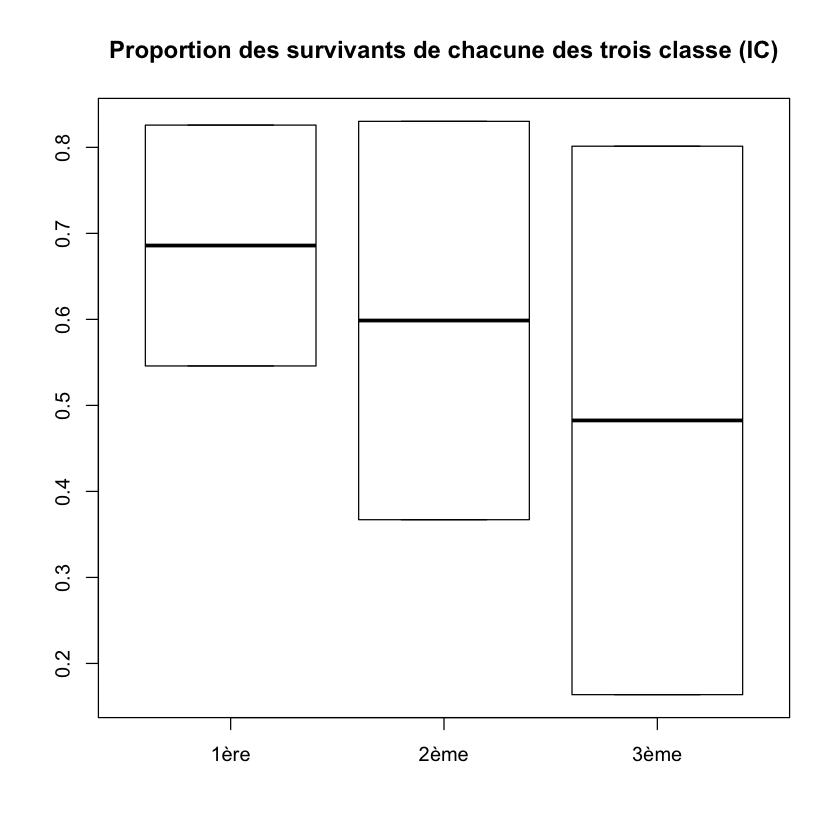

In [116]:
boxplot(IC_C1, IC_C2, IC_C3, names = c('1ère', '2ème', '3ème'), main = 'Proportion des survivants de chacune des trois classe (IC)')